# Good Reads Capstone 

Link: https://www.goodreads.com/shelf/show/currently-reading?page=1

Why Good Reads?

In [24]:
import requests
import re
from bs4 import BeautifulSoup
from contextlib import closing
import json
import time
import matplotlib.pyplot as plt

In [2]:
book_obj = obj.find('a',class_='bookTitle')
book_title = obj.find('a',class_='bookTitle').text
data_title = str(book_title).split("(")[0].strip()
link_book = "https://www.goodreads.com" + book_obj["href"]
# print(link_book)
# print(data_title)
book_read_times = obj.find('a',class_='smallText')
data_book_currently_reading = int(book_read_times.text.split()[1])
# print(data_book_currently_reading)

book_year_ratings = obj.find('span',class_='greyText smallText')
book_year_ratings_list = book_year_ratings.text.strip().split("\n")
str_book_ratings = book_year_ratings_list[1].strip().split()[0]
data_book_ratings = int("".join(str_book_ratings.split(",")))
# print(data_book_ratings)
data_book_year = book_year_ratings_list[2].strip().split()[1]
# print(data_book_year)

author_names = obj.find('a',class_='authorName')
data_author = author_names.text
# print(data_author)

link_author = author_names["href"]
author_sub_page = requests.get(link_author)
# print(link_author)
author_sub_soup = BeautifulSoup(author_sub_page.text, 'html.parser')
author_birth_place = ""
for char in author_sub_soup.find("div", class_ = "dataTitle").next_siblings:
    if char.name == "div":
        break
    else:
        author_birth_place += str(char)
# print(author_birth_place)
birth_country_stripped = author_birth_place.strip().split(",")[-1]
birth_country_stripped_1 = birth_country_stripped.strip()
data_birth_country = birth_country_stripped_1.split("\n")[0].strip()
if data_birth_country[0:3] == "The":
    data_birth_country = data_birth_country[4:].strip()
elif data_birth_country[0:6] == "in The":
    data_birth_country = data_birth_country[7:].strip()
elif data_birth_country[0:2] == "in":
    data_birth_country = data_birth_country[3:].strip()
elif data_birth_country == "":
    data_birth_country = "N/A"
# print(data_birth_country)



print(data_title)
print(type(data_title))
print(data_author)
print(type(data_author))
print(data_language)
print(type(data_language))
print(data_birth_country)
print(type(data_birth_country))
print(data_book_currently_reading)
print(type(data_book_currently_reading))
print(data_book_ratings)
print(type(data_book_ratings))


NameError: name 'obj' is not defined

# Why Mongos?

In [3]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.capstone_1_db
collection = db.good_reads_collections
data = pd.DataFrame(list(collection.find()))

In [6]:
data.tail()

,_id,author,birth_country,book_year,current_readers,language,ratings_number,title
95,5c65a2b513218a3005218691,George R.R. Martin,United States,1998.0,33527,English,686706,A Clash of Kings
96,5c65a2b813218a3005218692,Teresa Driscoll,N/A,2017.0,32000,N/A,73665,I Am Watching You
97,5c65a2b913218a3005218693,Leo Tolstoy,Russian Empire,1867.0,31724,English,230764,War and Peace
98,5c65a2ba13218a3005218694,J.K. Rowling,United Kingdom,1999.0,31298,English,2287071,Harry Potter and the Prisoner of Azkaban
99,5c65a2bb13218a3005218695,F. Scott Fitzgerald,United States,1925.0,31255,English,3215228,The Great Gatsby


In [12]:
new_data = data.iloc[50:]

In [14]:
new_data.head()

,_id,author,birth_country,book_year,current_readers,language,ratings_number,title
50,5c65a28213218a3005218664,Jane Austen,England,1813.0,110672,English,2514478,Pride and Prejudice
51,5c65a28313218a3005218665,Margaret Atwood,Canada,1985.0,92704,English,1016276,The Handmaid's Tale
52,5c65a28413218a3005218666,J.K. Rowling,United Kingdom,1997.0,86311,English,5768120,Harry Potter and the Sorcerer's Stone
53,5c65a28613218a3005218667,George R.R. Martin,United States,1996.0,85480,English,1704347,A Game of Thrones
54,5c65a28713218a3005218668,George Orwell,India,1949.0,78600,English,2510088,1984


In [21]:
data_split = data[["_id","book_year", "current_readers"]]

In [22]:
summed_data = data_split.groupby(["book_year"]).sum()


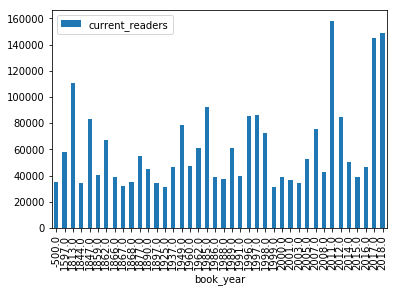

In [26]:
summed_data.plot.bar()